### Задание 1:

Придумайте матрицы, которые обладают следующими свойствами:

a) диагональная, ортогональная, но не единичная(!):

[1  0]
[0 -1]

b) верхнетреугольная, ортогональная:
[1  0]
[0 -1]

c) нижнетреугольная, ортогональная: 
[1  0]
[0 -1]


d) матрица, у которой определитель = 1, и все элементы не равны 0:
[5 4]
[6 5]

e) матрица (3x3), у которой определитель = 1:
[1 2 3]
[0 1 4]
[5 6 0]

P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!

### Задание 2:

Найдите собственные значения и собственные вектора матриц (необходимо решение на numpy и честное решение на бумаге:)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
m = np.array([[2, 2],
              [1, 3]])
print(m)

[[2 2]
 [1 3]]


In [22]:
w, v = np.linalg.eig(m)
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[i]))
    print("соответствующий ему собственный вектор " + str(v[:,i]))
print(v)


Собственное значение 1.0
соответствующий ему собственный вектор [-0.89442719 -0.70710678]
Собственное значение 4.0
соответствующий ему собственный вектор [ 0.4472136  -0.70710678]
[[-0.89442719 -0.70710678]
 [ 0.4472136  -0.70710678]]


In [ ]:
на бумаге считаем корни квадратного уравнения l**2 -5L + 4 = 0. 
Для собственного значения 1 получаем вектор [-2 1], для собственного значения 4 получаем вектор [1 1]


А почему в лекции такой пример? Ведь собственными векторами являются столбцы матрицы?


Для данного примера в честном решении можно "угадать" корни многочлена 3-ей степени, посмотрев на решение на numpy

In [7]:
m = np.array([[4, 1, -1],
              [1, 4, -1],
              [-1, -1, 4]])
print(m)

[[ 4  1 -1]
 [ 1  4 -1]
 [-1 -1  4]]


In [10]:
w, v = np.linalg.eig(m)
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[i]))


Собственное значение 5.999999999999998
соответствующий ему собственный вектор [-0.57735027 -0.81649658  0.15430335]
Собственное значение 2.9999999999999982
соответствующий ему собственный вектор [-0.57735027  0.40824829  0.6172134 ]
Собственное значение 2.9999999999999996
соответствующий ему собственный вектор [ 0.57735027 -0.40824829  0.77151675]
[[-0.57735027 -0.81649658  0.15430335]
 [-0.57735027  0.40824829  0.6172134 ]
 [ 0.57735027 -0.40824829  0.77151675]]


In [ ]:
Для значения 6 получаем систему -2x+y+z=0,x-2y-z=0,-x-y-2z=0
В результате решения получаем вектор [-1 -1 1]
для значения 3 получем систему x+y-z=0,-x-y+z=0
В качестве вектора можно взять [0.5 0.5 1]


И все тот же вопрос про столбцы

### Задание 3:

Найдите спектральное разложение матрицы (честное решение на бумаге и на numpy)

In [23]:
m = np.array([[1, 2],
              [2,3]])
print(m)

[[1 2]
 [2 3]]


In [25]:
w, v = np.linalg.eig(m)
print(w)
print(v * np.diag(m) * v.T)

[-0.23606798  4.23606798]
[[ 0.7236068  -0.82917961]
 [-0.2763932   2.17082039]]


### Задание 4:

Для примера из лекции постройте график зависимости oob_score RandomForestClassifier от количества компонент при сжатии с помощью SVD

In [26]:
import numpy as np
import pylab as pl
import warnings

from matplotlib import pyplot as plt
from scipy import linalg
from sklearn.datasets import load_digits
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

In [42]:
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

In [28]:
X, y = load_digits(return_X_y=True)

In [29]:
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


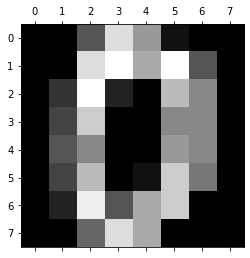

In [30]:
image = X[0]
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')
plt.show()

In [39]:
svd = TruncatedSVD(n_components=10)
X_reduced = svd.fit_transform(X)
svd.explained_variance_ratio_.sum()

0.7324264969984844

In [40]:
rf_reduced = RandomForestClassifier(oob_score=True)
rf_reduced.fit(X_reduced, y)
rf_reduced.oob_score_

0.9565943238731218

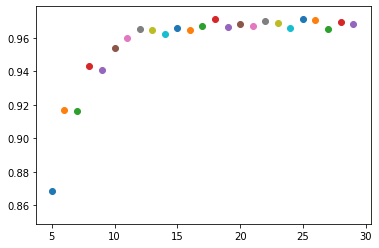

In [41]:
for i in range(5, 30):
    svd = TruncatedSVD(n_components=i)
    X_reduced = svd.fit_transform(X)
#svd.explained_variance_ratio_.sum()
    rf_reduced = RandomForestClassifier(oob_score=True)
    rf_reduced.fit(X_reduced, y)
    os = rf_reduced.oob_score_
    plt.scatter(i, os)